In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
test=pd.read_csv('train.csv')
len(test)

1460

In [73]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train['type']='train'
test['type']='test'
sample=pd.read_csv('sample_submission.csv')
df=pd.concat([train,test])


In [80]:
print(df.info())

print(df.describe())
df.apply(lambda x: x.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
type                0
Length: 82, dtype: int64

In [75]:
categorical_vars= df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(exclude=['object']).columns
categorical_vars=categorical_vars.drop(['type'])
#train[categorical_vars].describe().T


In [76]:
categorical_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

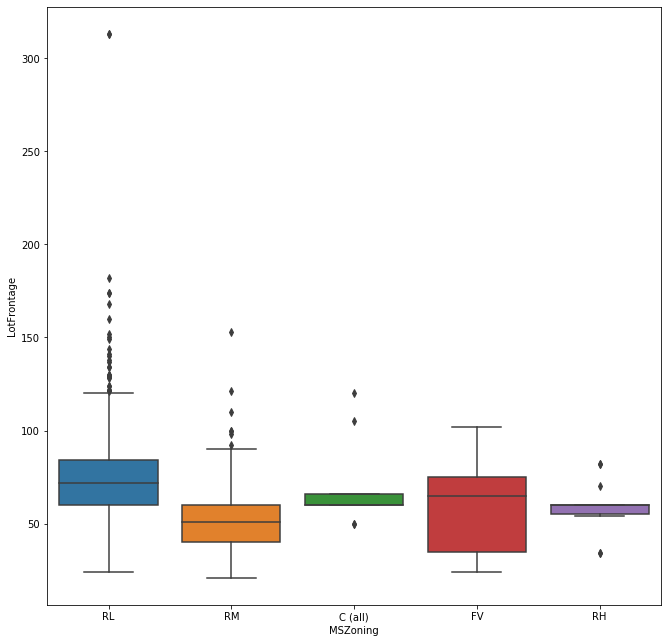

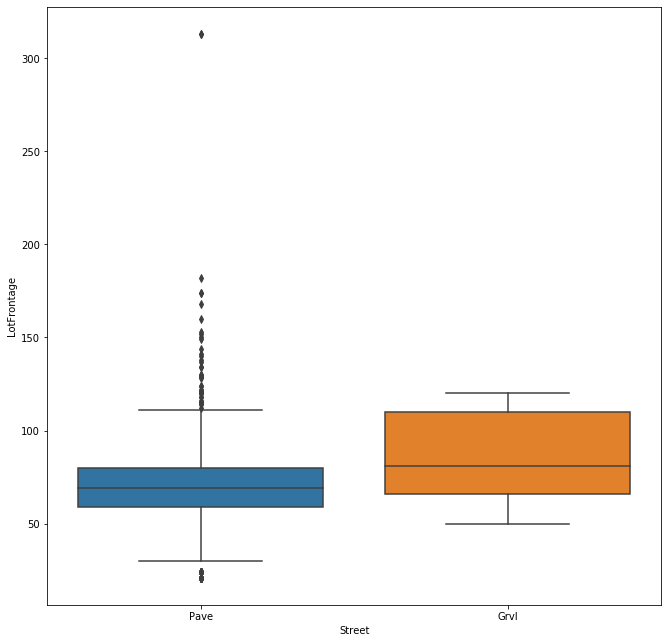

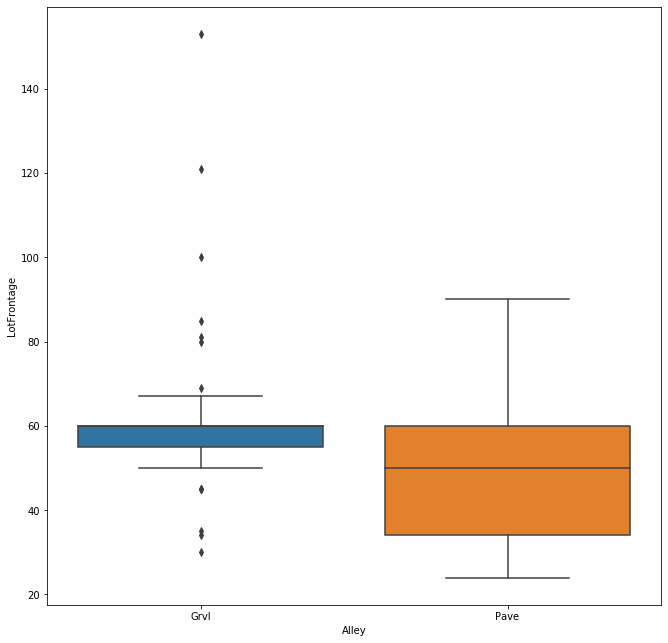

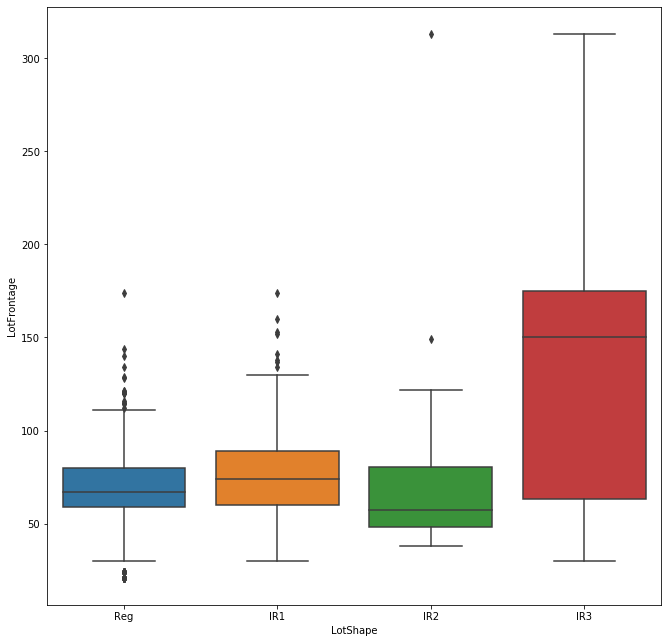

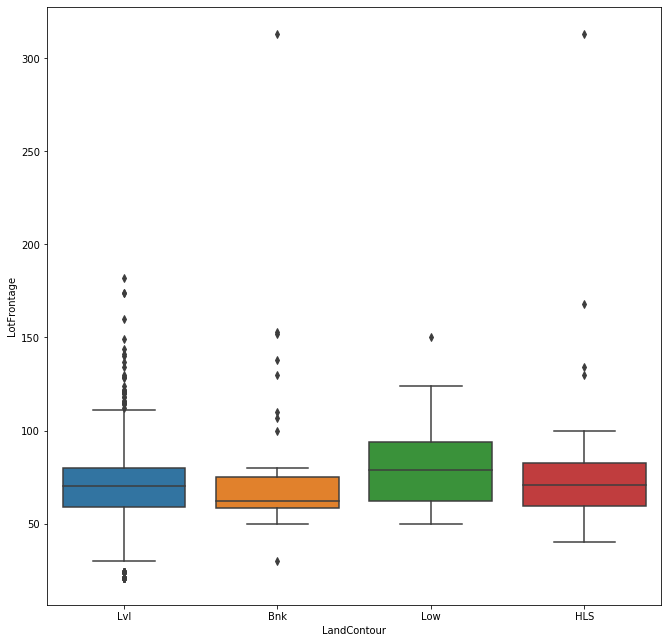

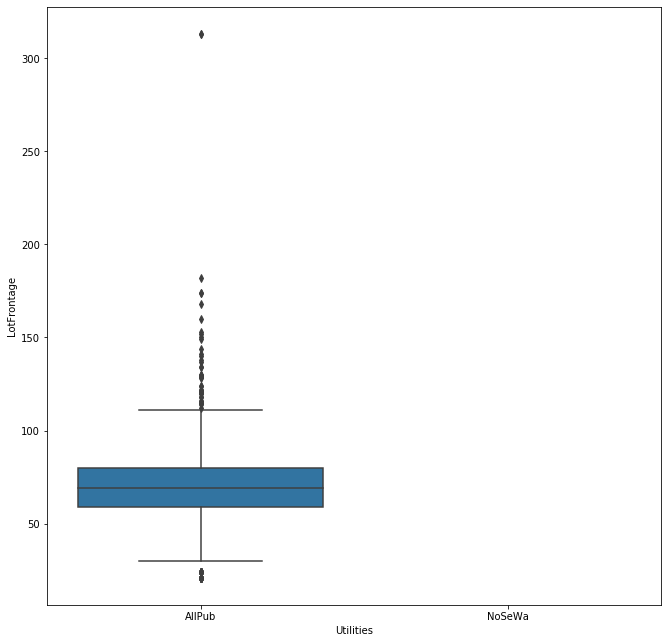

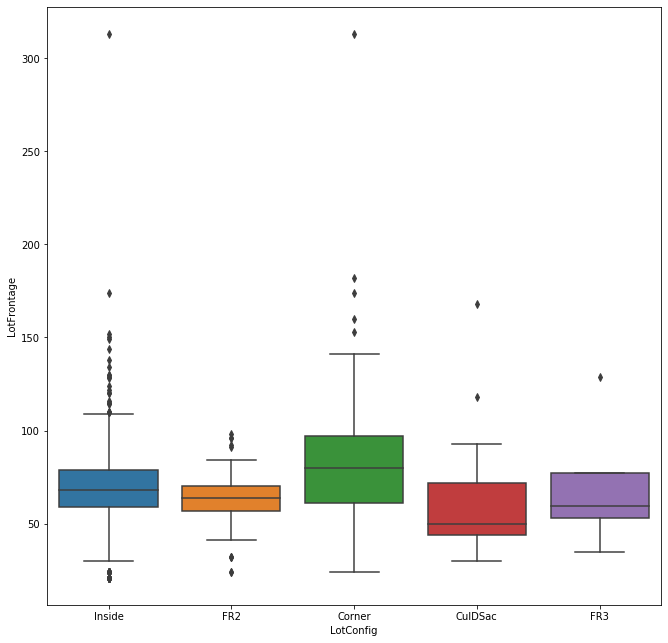

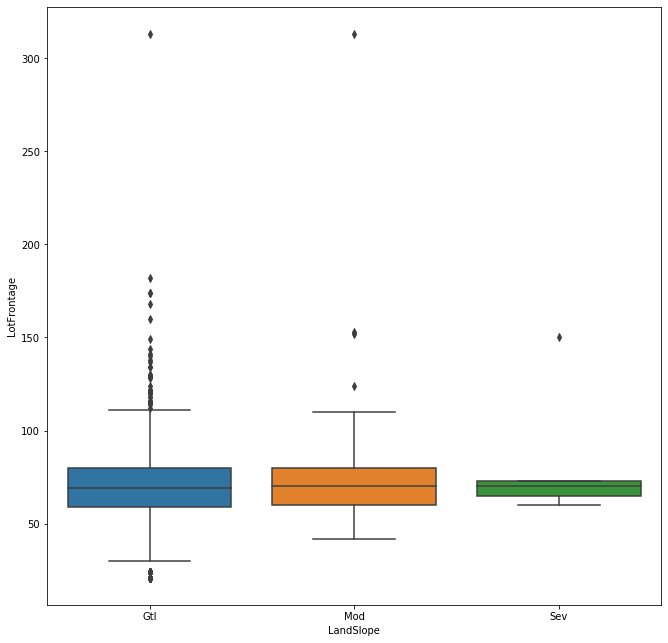

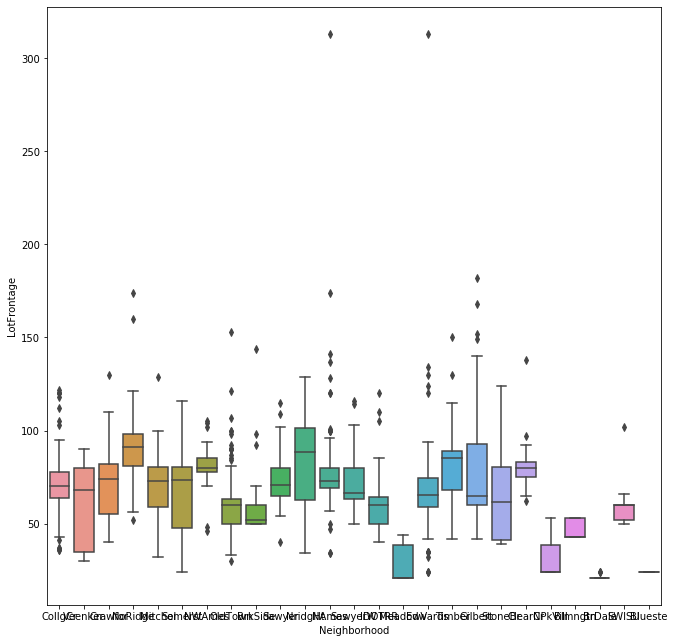

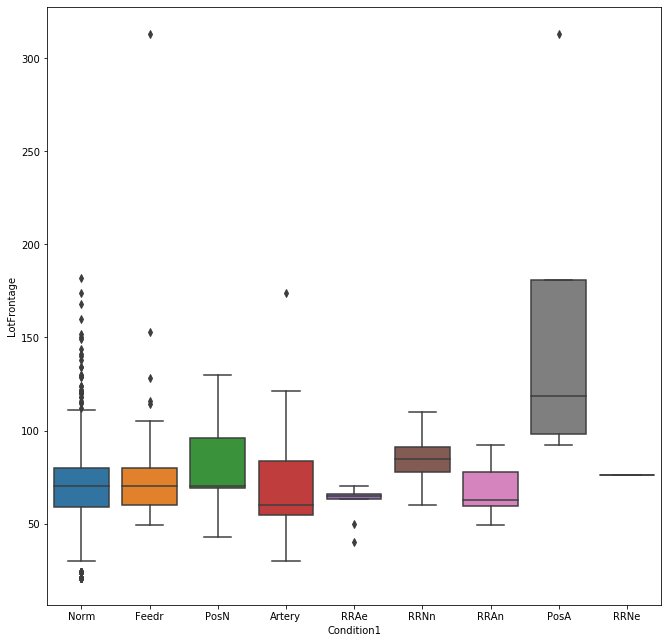

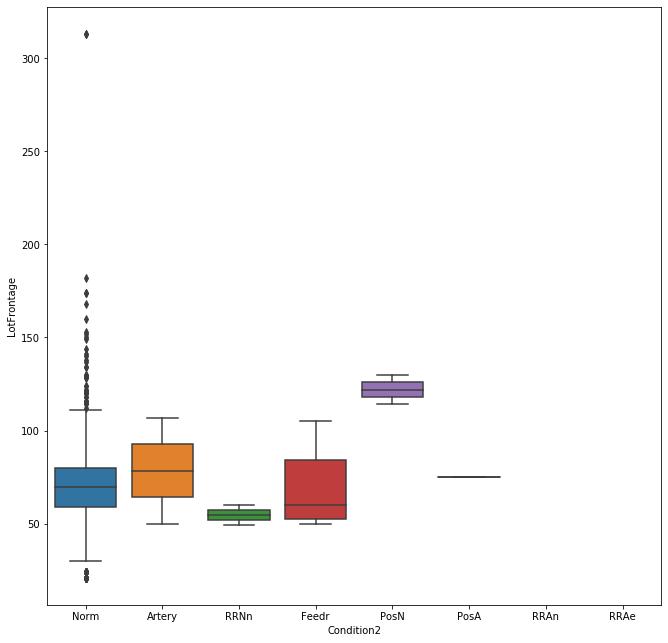

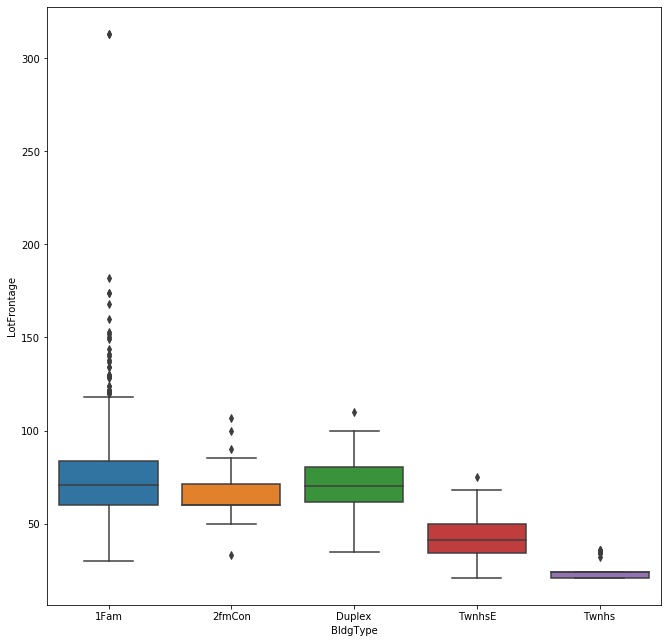

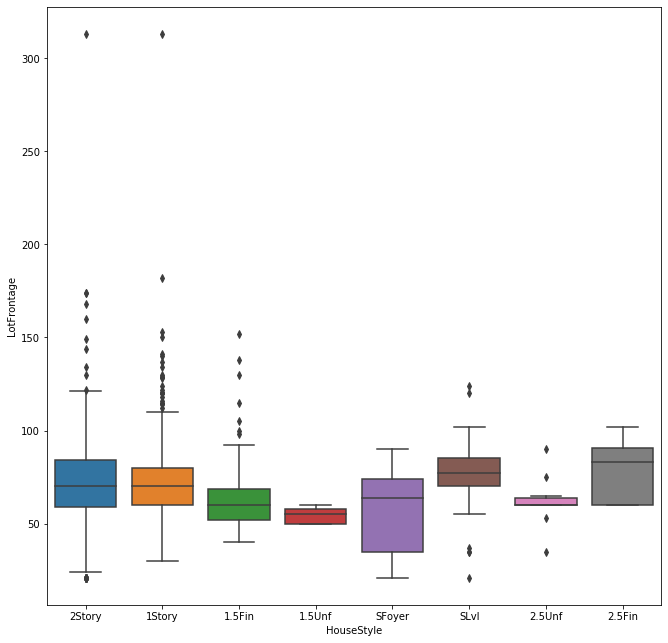

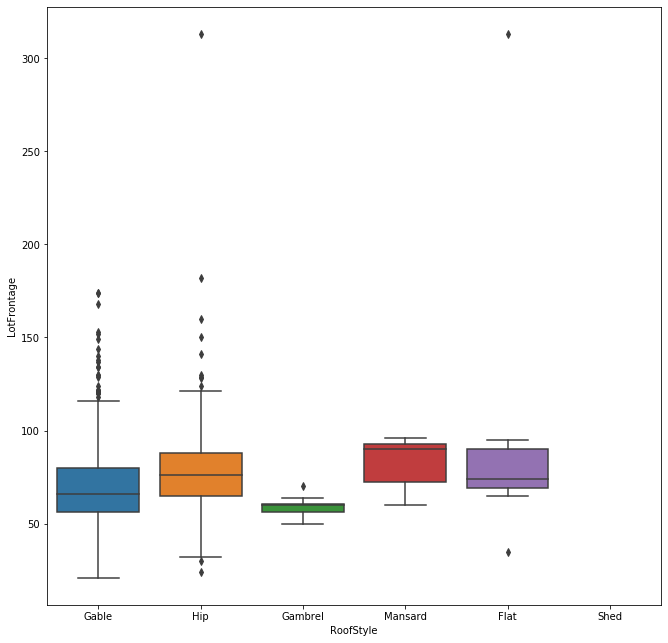

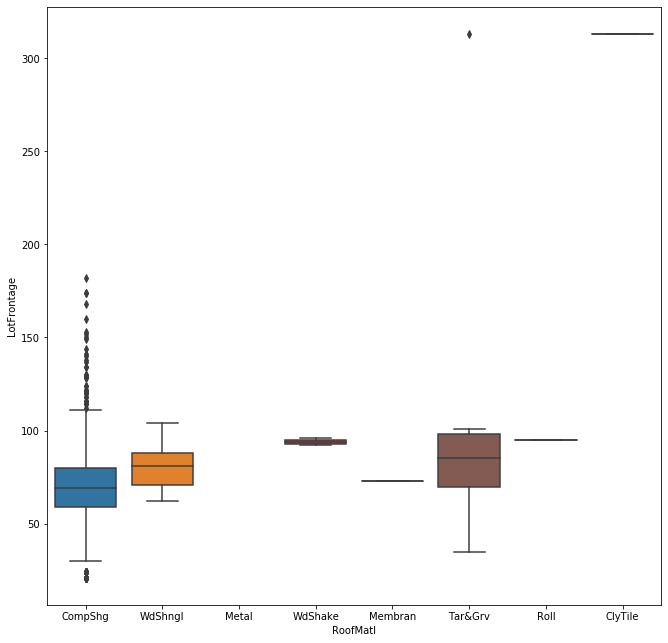

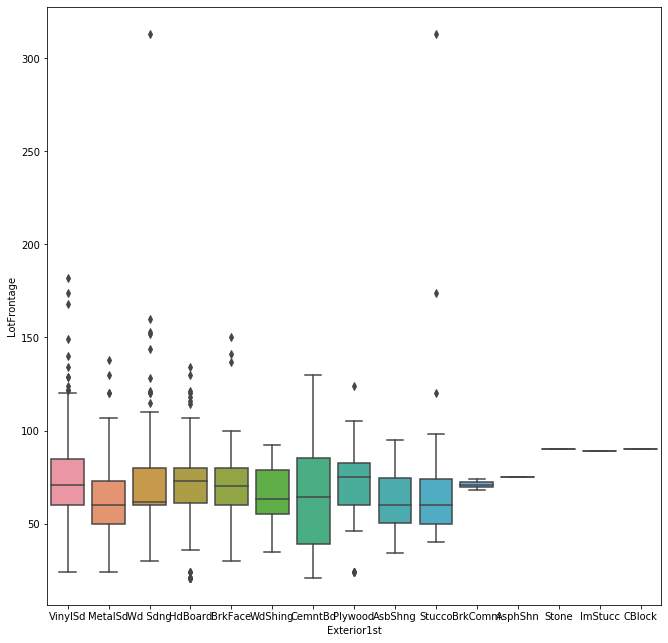

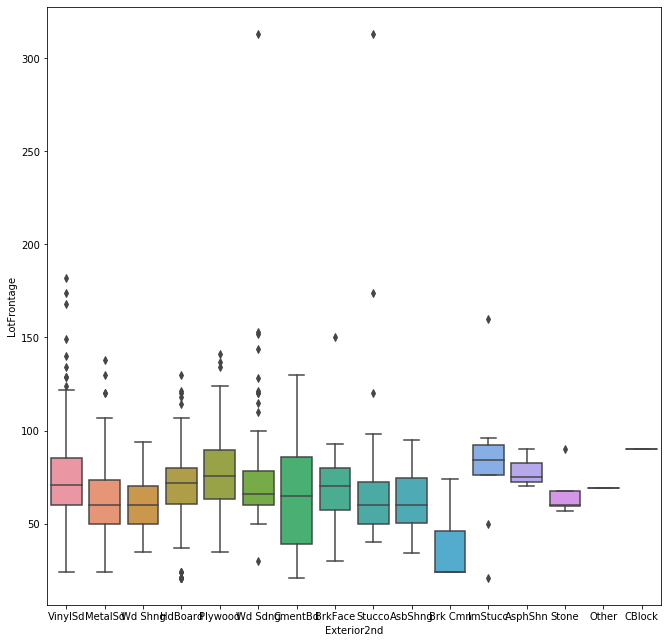

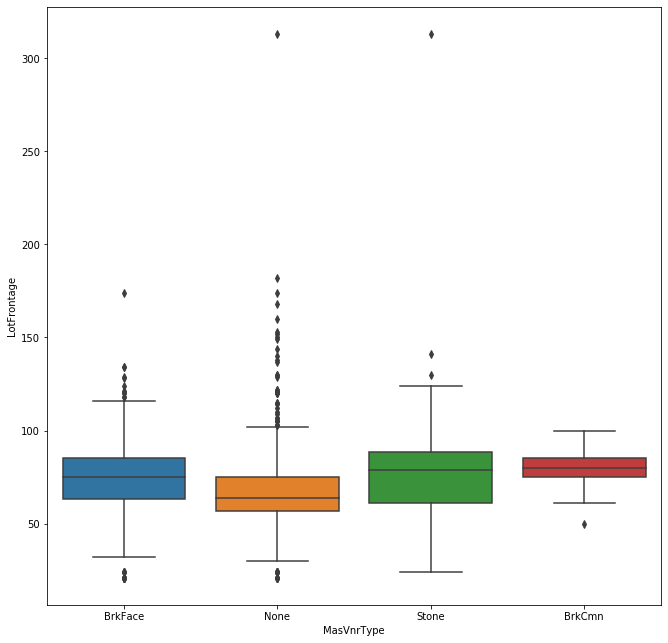

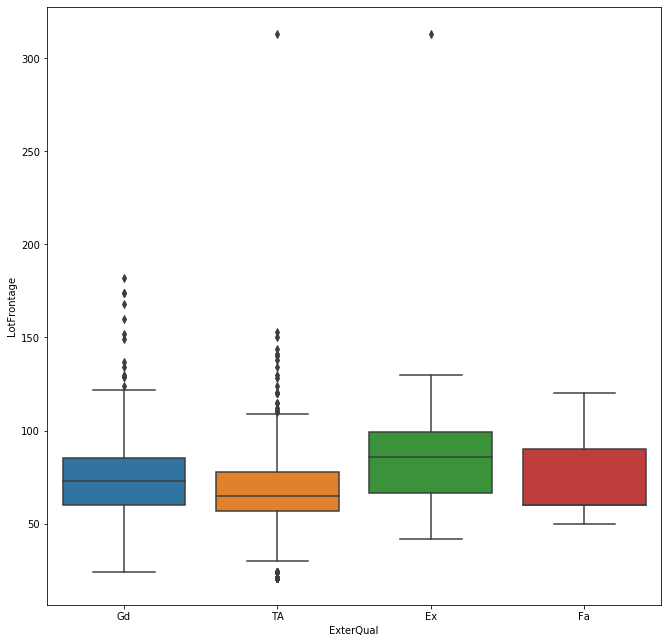

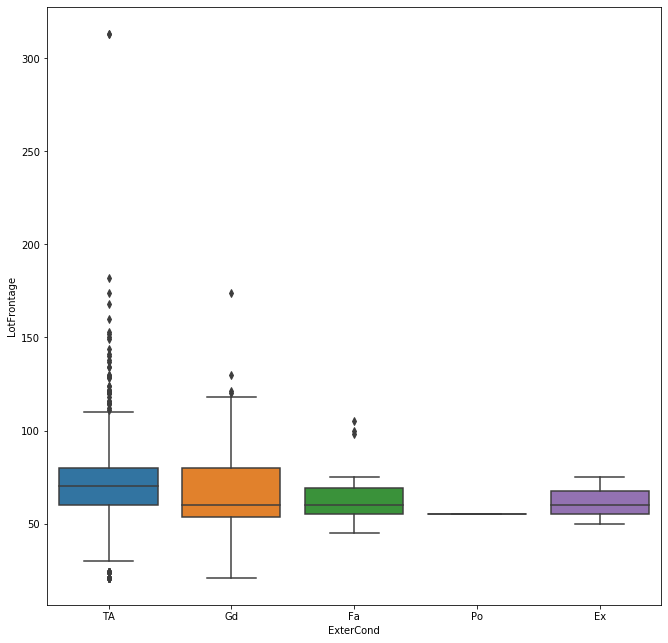

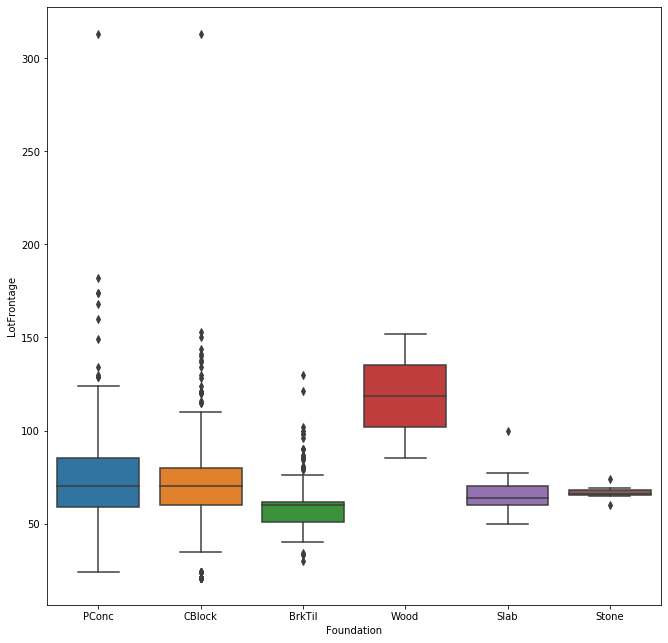

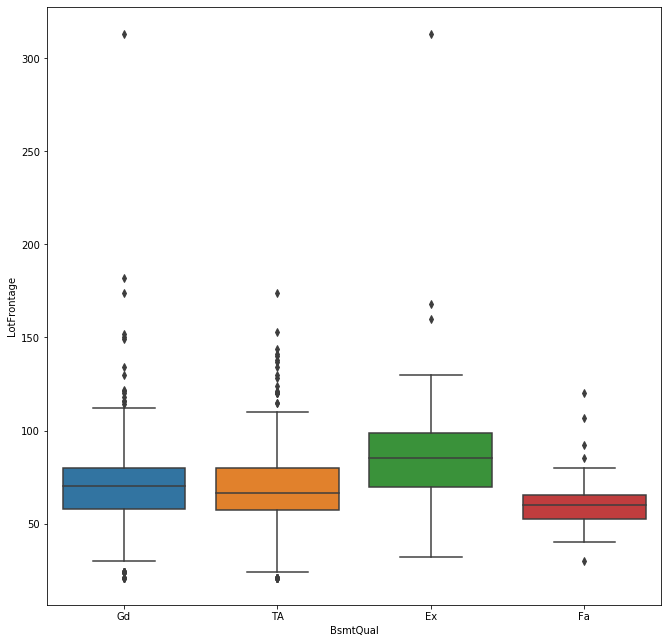

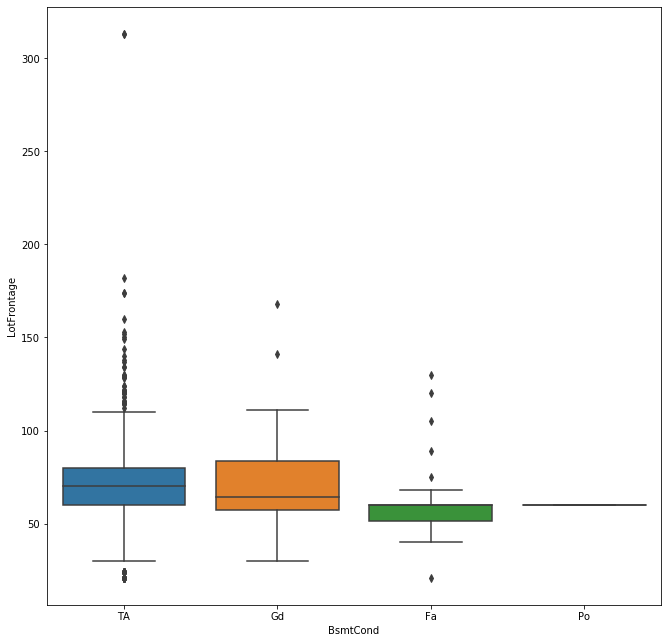

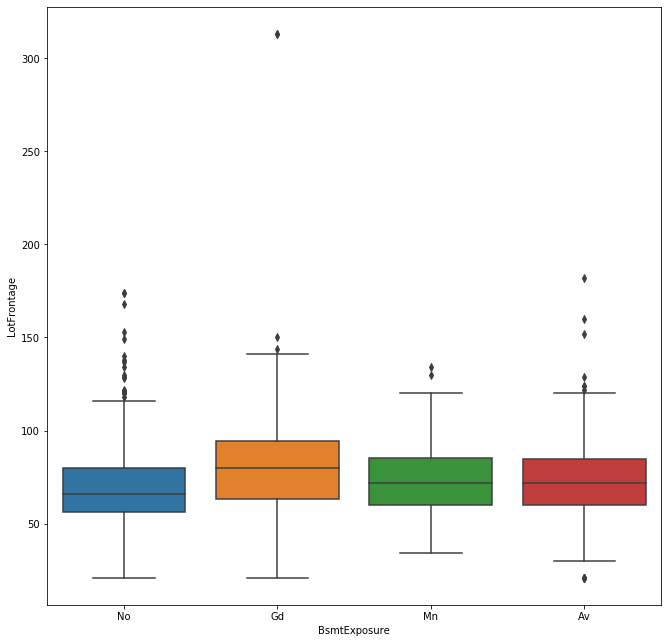

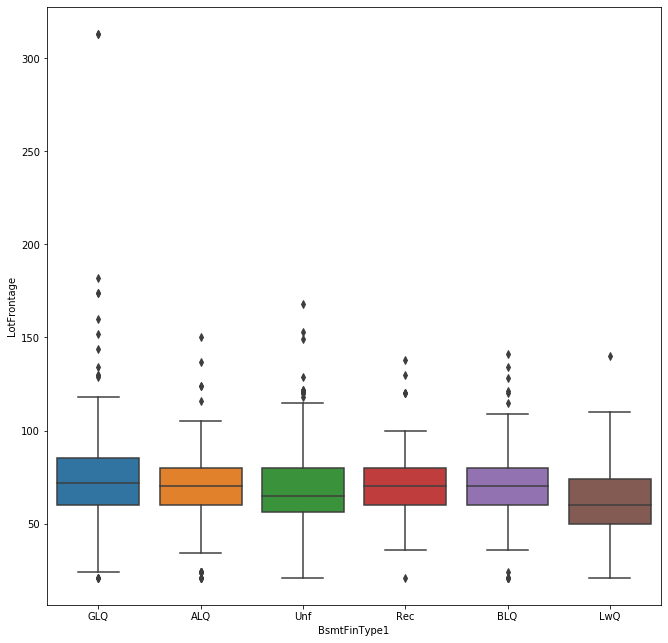

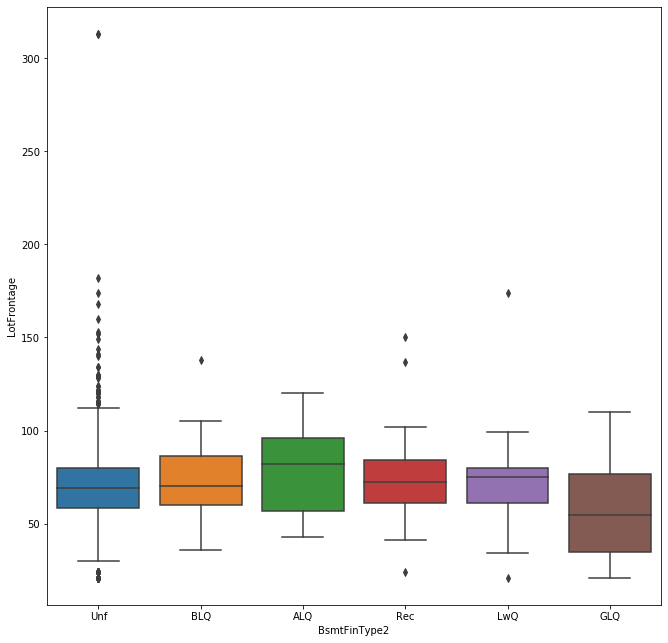

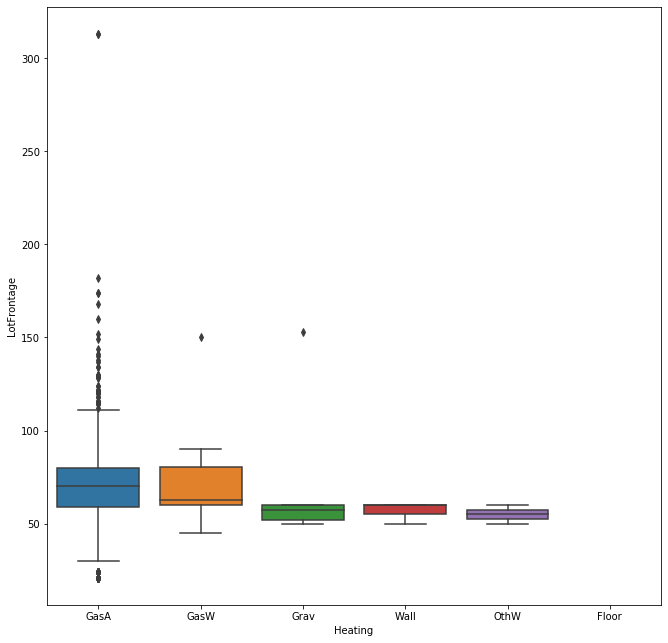

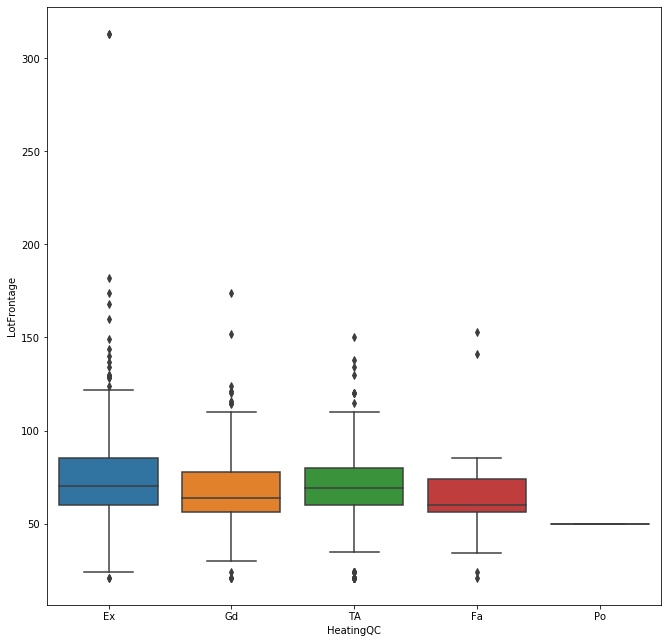

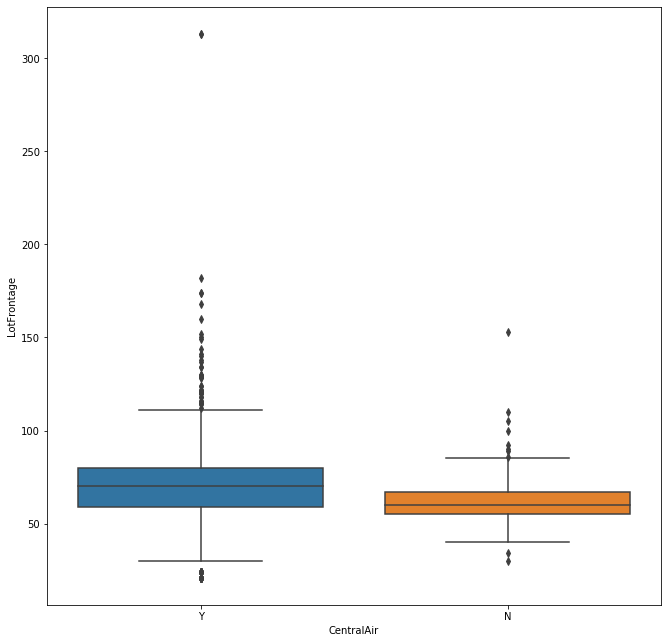

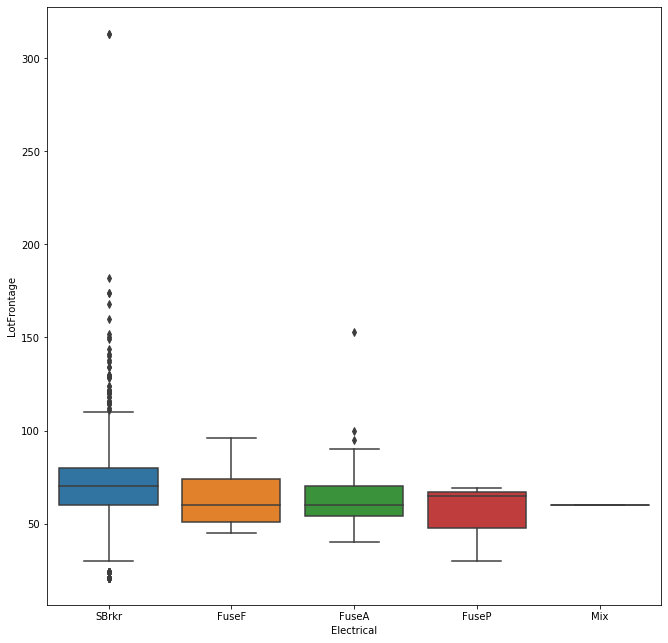

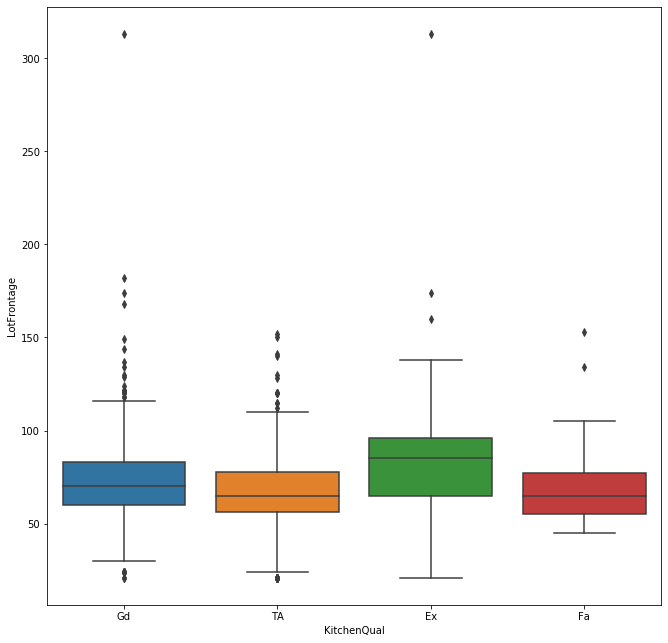

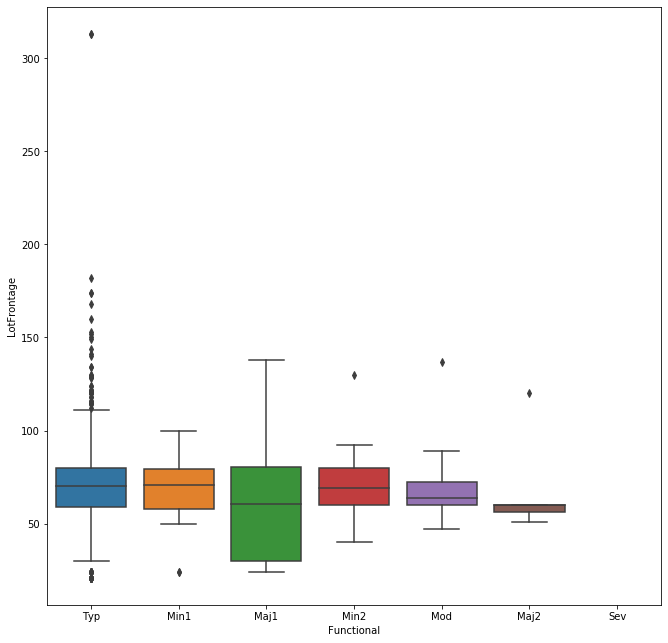

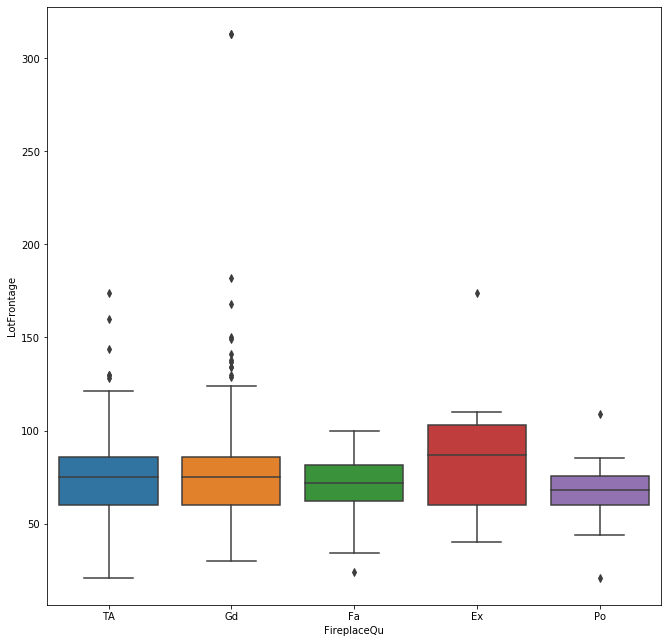

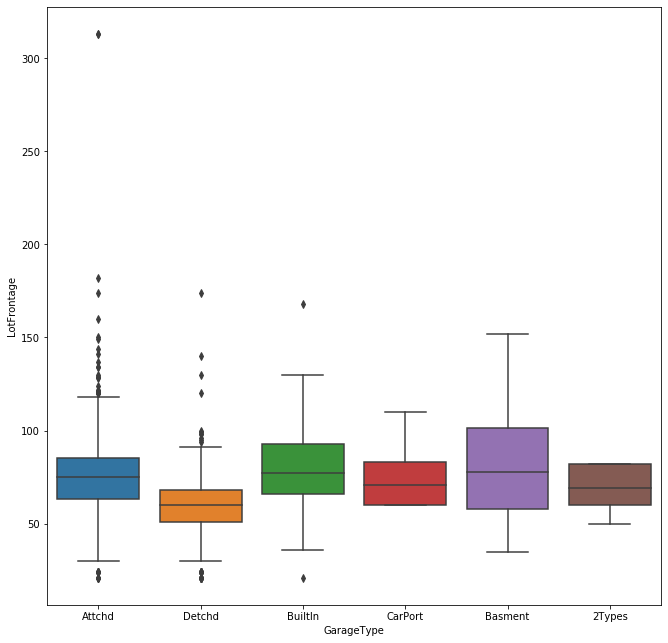

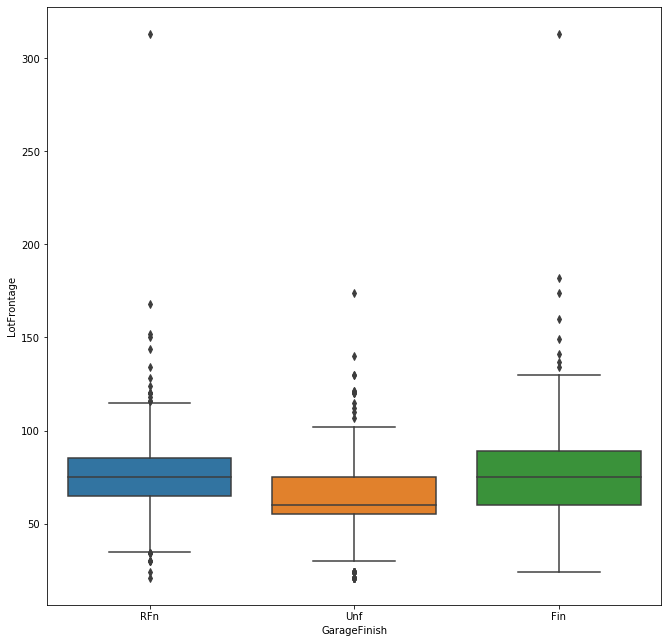

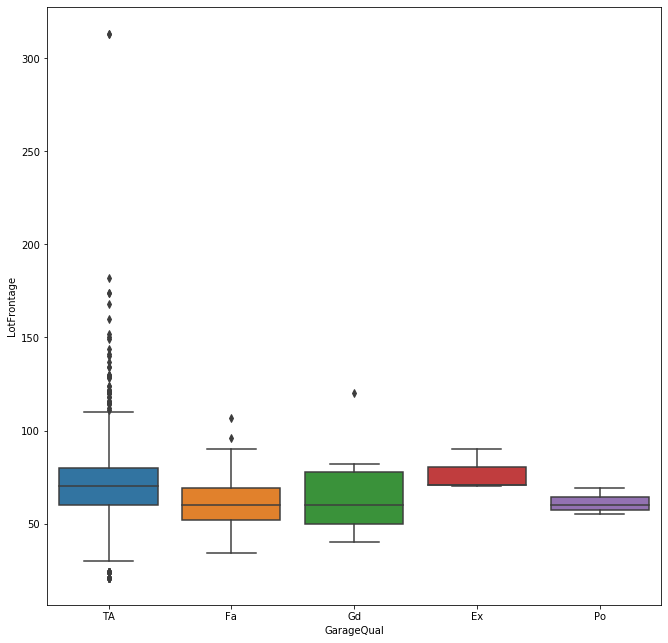

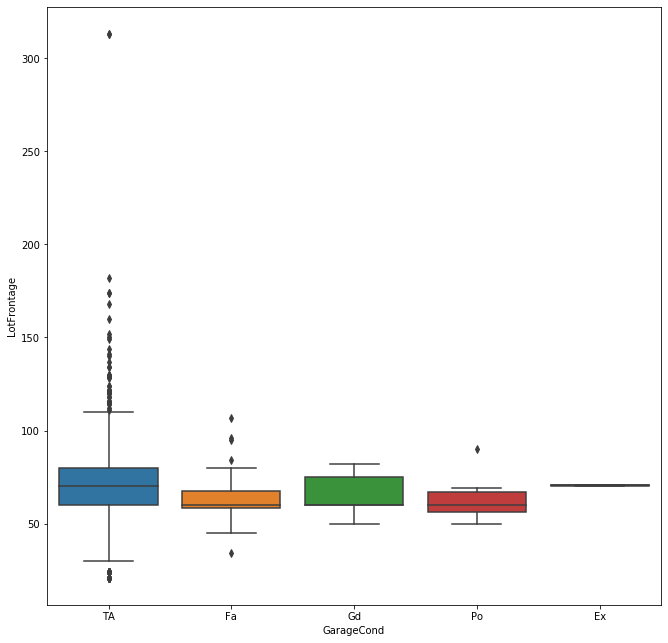

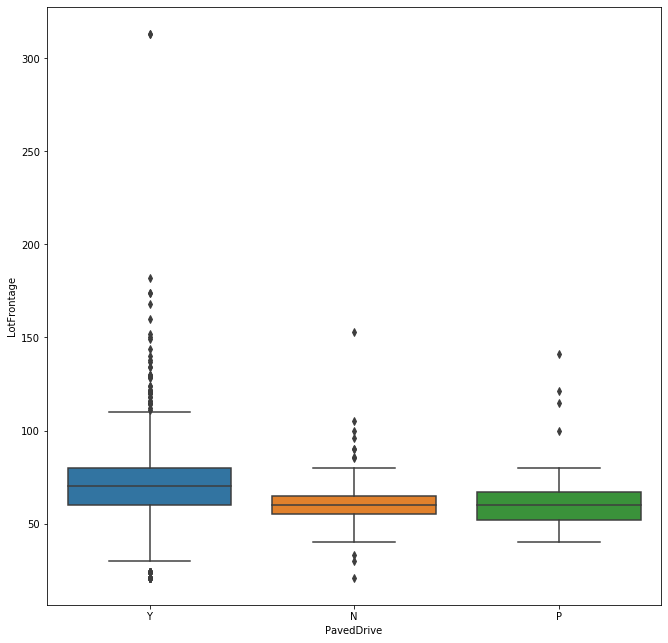

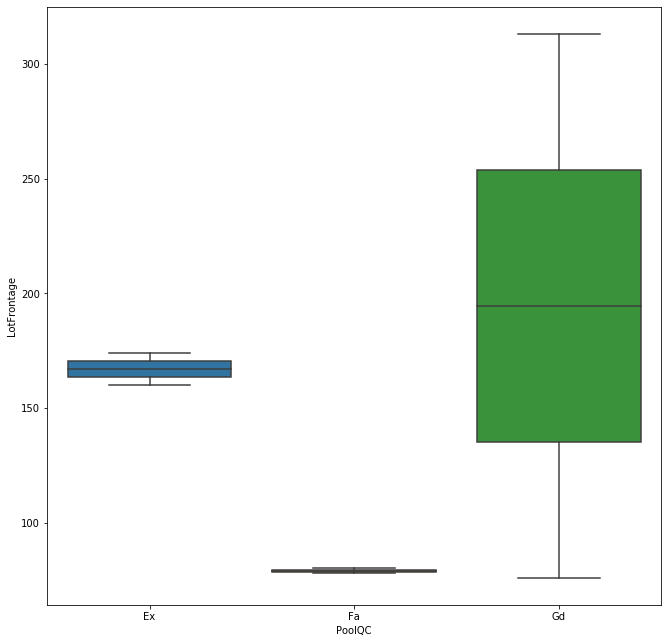

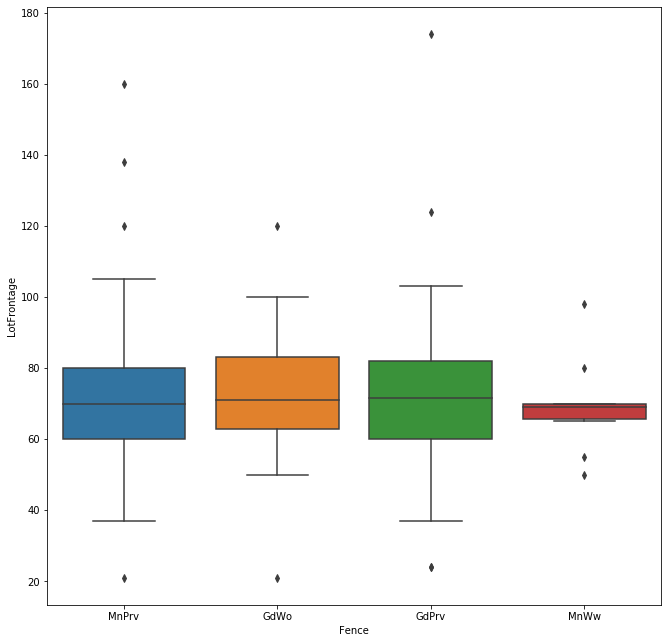

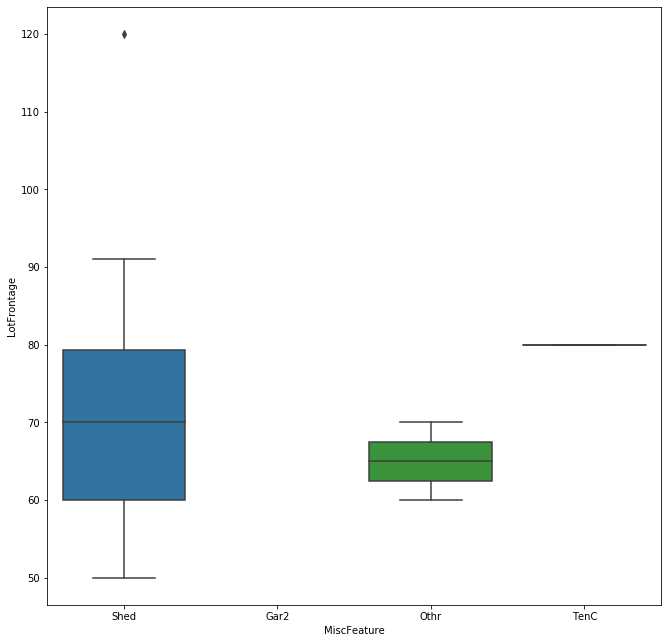

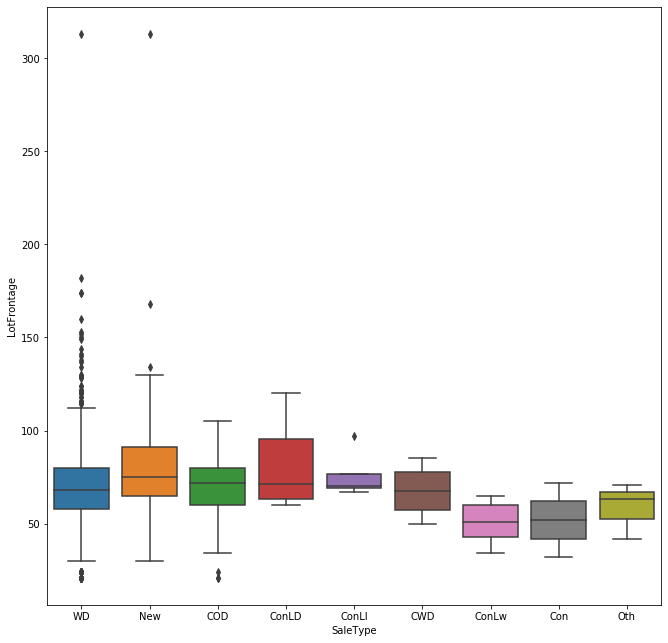

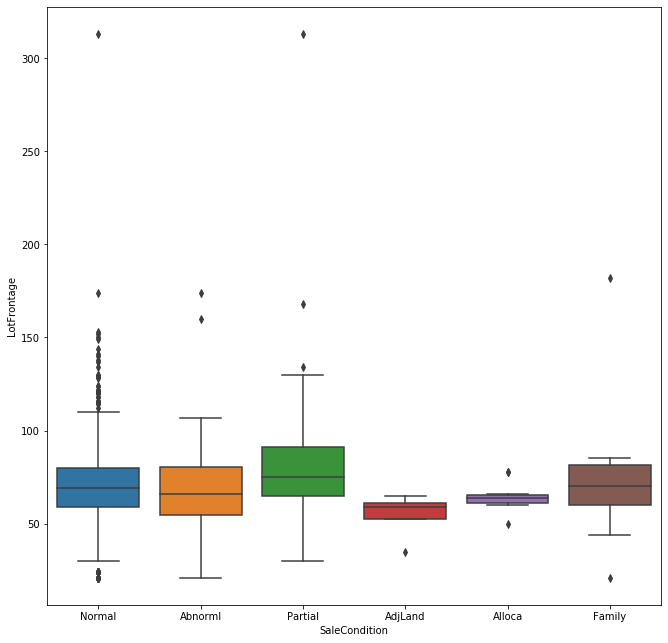

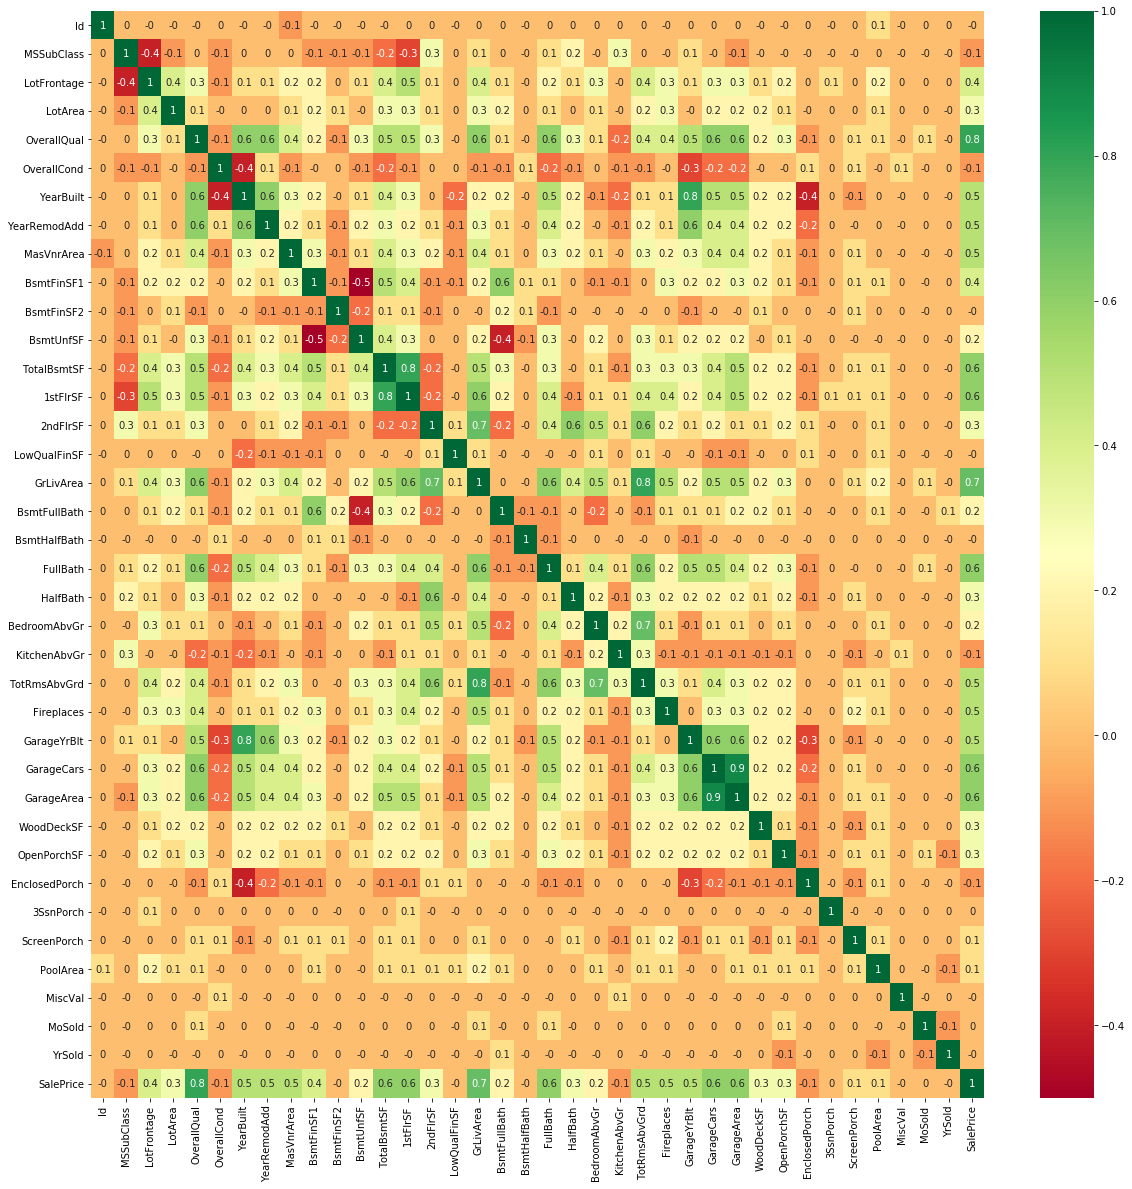

In [77]:
##missing value correction
#columns to check- PoolQC , Fence , MiscFeature, GarageCond, GarageQual, GarageFinish, GarageYrBlt , GarageType, Electrical 
#FireplaceQu , BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond , BsmtQual, MasVnrType, MasVnrArea,  Alley, LotFrontage

train['BsmtExposure'].value_counts().index[0]
train['GarageYrBlt'].median()
#train['LotFrontage']
import seaborn as sns
from matplotlib.pyplot import yticks, xticks, subplots, set_cmap
import matplotlib.pyplot as plt
for i in categorical_vars:
    plt.figure(figsize=(11,11))
    sns.boxplot(x=train[i],y=train['LotFrontage'])
    plt.show()
    plt.close()
#train[train['LotFrontage']
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
train['Electrical'].value_counts()
train_null_counts=train.apply(lambda x: x.isnull().sum(axis=0))

In [78]:
#missing value imputation for both train & test

df['PoolQC'].fillna('NA',inplace=True)
df['Fence'].fillna('None',inplace=True)
df['MiscFeature'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)
df['GarageType'].fillna('NA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['Electrical'].fillna(df['Electrical'].value_counts().index[0],inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtExposure']=np.where((df['BsmtExposure'].isnull()) & (df['BsmtFinType1']=='NA'),'NA',df['BsmtExposure'])
df['BsmtExposure'].fillna(df['BsmtExposure'].value_counts().index[0],inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0.0,inplace=True)
df['Alley'].fillna('NA',inplace=True) 
df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='NA'),df[df['Alley']=='NA'].LotFrontage.mean(),df['LotFrontage'] )
df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Grvl'),df[df['Alley']=='Grvl'].LotFrontage.mean(),df['LotFrontage'] )
df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Pave'),df[df['Alley']=='Pave'].LotFrontage.mean(),df['LotFrontage'] )

#MSZoning , Utilities, Exterior2nd, BsmtFinSF1,BsmtFinSF2,
# BsmtHalfBath, GarageArea
df['Exterior1st'].fillna(df['Exterior1st'].value_counts().index[0],inplace=True)
df['BsmtUnfSF'].fillna(0.0,inplace=True)
df['TotalBsmtSF'].fillna(0.0,inplace=True)
df['BsmtFullBath'].fillna(0.0,inplace=True)
df['KitchenQual'].fillna('TA',inplace=True)
df['Functional'].fillna('Typ',inplace=True)
df['GarageCars'].fillna(0.0,inplace=True)
df['MSZoning'].fillna(df['MSZoning'].value_counts().index[0],inplace=True)
df['Utilities'].fillna(df['Utilities'].value_counts().index[0],inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().index[0],inplace=True)
df['BsmtFinSF1'].fillna(0.0,inplace=True)
df['BsmtFinSF2'].fillna(0.0,inplace=True)
df['BsmtHalfBath'].fillna(0.0,inplace=True)
df['GarageArea'].fillna(0.0,inplace=True)

In [79]:
df['BsmtHalfBath'].value_counts(dropna=False)

0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [81]:
#One Hot Encoding of the Categorical features 
ls=[]
list_df=[]
for i in categorical_vars:
    locals()['df_' + str(i)]=pd.get_dummies(df[i],prefix=i)
    ls.append(locals()['df_' + str(i)])
df.drop(categorical_vars,axis=1,inplace=True)
list_df.append(df)
list_df.extend(ls)
df=pd.concat(list_df,axis=1)    


In [82]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [120]:
#df.reset_index(inplace=True)
#df.drop(['level_0','index'],axis=1,inplace=True)
df.shape

(2919, 305)

In [121]:
train=df.head(1459)
test=df.tail(1459)
target=train['SalePrice']
train.drop(['type','SalePrice'],axis=1,inplace=True)
test.drop(['type','SalePrice'],axis=1,inplace=True)

In [122]:
test.shape

(1459, 303)

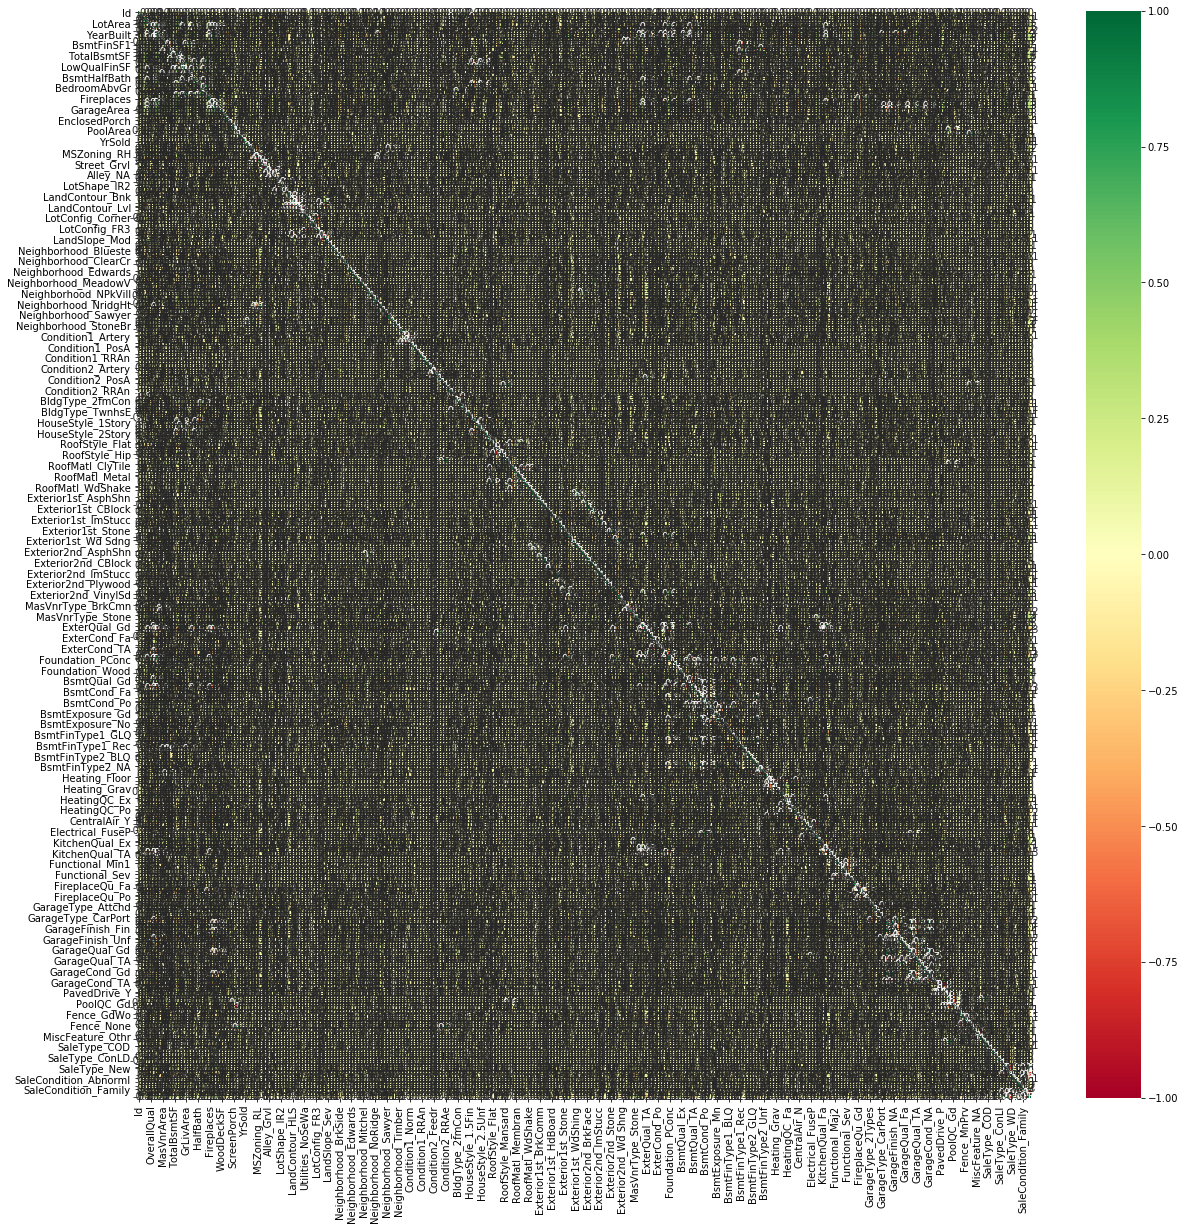

In [123]:
#check correlation
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [124]:
train.shape

(1459, 303)

In [125]:

#drop correlated columns
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9 or corrmat.iloc[i,j] <= -0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [126]:
len(selected_columns)

286

In [127]:
selected_columns = train.columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                try:
                    if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                        x = np.delete(x, j, 1)
                        columns = np.delete(columns, j)
                except:
                    continue
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(train.iloc[,1:].values, target.values, SL, selected_columns)

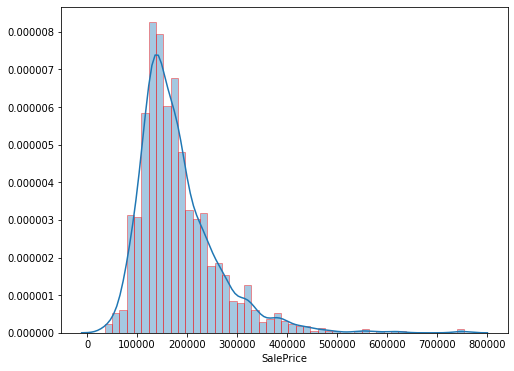

In [225]:
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)})  #right skewed

In [230]:
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 0.120706
Kurtosis: 0.807294


In [228]:
target= np.log1p(target)


In [128]:
len(selected_columns)
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
Name: SalePrice, Length: 1459, dtype: float64

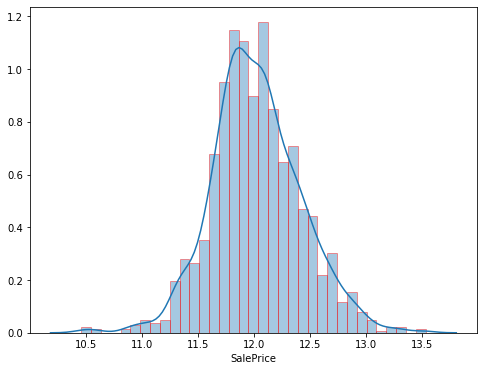

In [229]:
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)})  #right skewed

In [129]:
len(selected_columns)

data = pd.DataFrame(data = data_modeled, columns = selected_columns)


In [130]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea',
       'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'Street_Grvl',
       'LandContour_Low', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofStyle_Shed',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkFace', 'MasVnrType_BrkFace', 'ExterQual_Gd',
       'Ext

In [231]:
#split_data
x_train, x_test, y_train, y_test = train_test_split(data.values,target.values, test_size = 0.2)

In [234]:
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice, Length: 1459, dtype: float64

In [232]:
scaler = StandardScaler()   
scaler=scaler.fit(x_train)
pickle.dump(scaler,open('scaler.pkl','wb'))

scaler=pickle.load(open('scaler.pkl','rb'))
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [233]:
names = ["GBM","XGB","LGBM"]
#XGBRegressor(max_delta_step=2,scale_pos_weight=100)   -  "XGB"
regressors = [GradientBoostingRegressor(n_estimators=100,random_state=0,verbose=1),
    XGBRegressor(max_delta_step=2,scale_pos_weight=100,random_state=0) ,
    LGBMRegressor(n_estimators=100,random_state=0,num_leaves=40,learning_rate=0.5)]

In [235]:
rmse_cv=[]
rmse_test=[]
#num_leaves=150, objective='regression',max_depth=7,learning_rate=.05,max_bin=200
for name,model in zip(names,regressors):
    print(name, model)
    score = cross_val_score(model, x_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
    y_pred=model.predict(x_test)
    score_test=mean_squared_error(y_test,y_pred)
    rmse_test.append(score_test.mean())
    print('Rmse',score.mean())
    rmse.append(score.mean())

GBM GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)
      Iter       Train Loss   Remaining Time 
         1           0.1389            0.79s
         2           0.1209            0.39s
         3           0.1060            0.52s
         4           0.0933            0.58s
         5           0.0827            0.61s
         6           0.0737            0.50s
         7       

In [236]:
rmse

[-0.0001539237484455108, -0.00016903951341509487, -0.00023111344282207444]

In [248]:

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,5,7],'min_samples_split':[2,5,10], 'max_features':[3,4],'n_estimators':[100,500,1000,2000]}

model=XGBRegressor(max_delta_step=2,scale_pos_weight=100)
model = GridSearchCV(model, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')
model3=GradientBoostingRegressor()
model3 = GridSearchCV(model3, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')

model2=LGBMRegressor(max_delta_step=2,scale_pos_weight=100)
model2 = GridSearchCV(model2, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')

print(model)
model2.fit(x_train, y_train)

#score = model.score(np.array(x_test), y_test)
#y_pred=model.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=2, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=100, seed=None,
                                    silent=None, subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [3, 4],
                         'min_samples_split': [2, 5, 10],

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, score=-0.000, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, score=-0.000, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, score=-0.000, total=   0.6s
[CV] max_depth=3, max_features=3, 

[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, score=-0.000, total=   1.2s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, score=-0.000, total=   1.3s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=3, max_features=3,

[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, score=-0.000, total=   0.5s
[CV] max_depth=3, max_features=4, min_

[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, score=-0.000, total=   1.0s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, score=-0.000, total=   1.1s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, score=-0.000, total=   1.1s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, score=-0.000, total=   1.3s
[CV] max_depth=3, max_features=4,

[CV]  max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=2, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, score=-0.000, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.4s
[CV] max_depth=5, max_features=3, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_featu

[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, score=-0.000, total=   0.4s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, score=-0.000, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, score=-0.000, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_featu

[CV]  max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, score=-0.000, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_split=10, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, score=-0.000, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_split=10, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, score=-0.000, total=   0.6s
[CV] max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: ma

[CV]  max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.4s
[CV] max_depth=5, max_features=4, min_samples_split=2, n_estimators=500 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, score=-0.000, total=   0.5s
[CV] max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, score=-0.000, total=   0.9s
[CV] max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_fe

[CV]  max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, score=-0.000, total=   0.9s
[CV] max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, score=-0.000, total=   0.9s
[CV] max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, score=-0.000, total=   0.9s
[CV] max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max

[CV]  max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, score=-0.000, total=   1.1s
[CV] max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, score=-0.000, total=   1.0s
[CV] max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, score=-0.000, total=   0.9s
[CV] max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000 
[LightGBM] [Warning] Unknown paramete

[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, score=-0.000, total=   1.3s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, score=-0.000, total=   1.4s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, score=-0.000, total=   2.3s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max

[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, score=-0.000, total=   2.3s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, score=-0.000, total=   2.4s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, score=-0.000, total=   2.4s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max

[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, score=-0.000, total=   2.4s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, score=-0.000, total=   2.7s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, score=-0.000, total=   2.6s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000 
[LightGBM] [Warning] Unknown paramete

[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, score=-0.000, total=   2.6s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, score=-0.000, total=   2.7s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, score=-0.000, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_fe

[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-0.000, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-0.000, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-0.000, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
[LightGBM] [Warning] Unknown parameter: max

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_delta_step=2, max_depth=-1,
                                     min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0,
                                     scale_pos_weight=100, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [

In [249]:
model_cv=model2.best_estimator_
#model_lgbm=model2.best_estimator_

print(model_cv)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_delta_step=2,
              max_depth=3, max_features=3, min_child_samples=20,
              min_child_weight=0.001, min_samples_split=2, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              scale_pos_weight=100, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


In [250]:
rmse

[-0.0001539237484455108, -0.00016903951341509487, -0.00023111344282207444]

[21:25:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=2,
             max_depth=3, max_features=3, min_child_weight=1,
             min_samples_split=2, missing=None, n_estimators=250, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=100, seed=None, silent=None,
             subsample=1, verbosity=1)

In [239]:
score = model_cv.score(np.array(x_test), y_test)

In [240]:
score=cross_val_score(model_cv, x_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
print('Rmse',score.mean())

Rmse -0.0001608053087297917


## Test set predictions

In [199]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea',
       'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'Street_Grvl',
       'LandContour_Low', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofStyle_Shed',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkFace', 'MasVnrType_BrkFace', 'ExterQual_Gd',
       'Ext

In [200]:
model_cv.feature_importances_

array([2.89300013e-02, 1.75663068e-01, 7.67608180e-03, 9.07274799e-02,
       2.92774929e-02, 1.78979992e-02, 3.57487808e-02, 8.11116634e-02,
       3.86562171e-02, 4.49318063e-02, 1.17348564e-03, 6.22904331e-02,
       6.77290325e-03, 6.43655742e-03, 4.41661720e-02, 2.57839543e-02,
       8.31922447e-03, 2.31874146e-03, 2.40927298e-03, 1.33659638e-03,
       2.02693605e-03, 9.86830046e-04, 2.14934865e-05, 2.91773357e-03,
       1.37519365e-03, 1.66436436e-03, 3.87877184e-03, 3.56521449e-03,
       1.38773582e-03, 3.47173972e-04, 4.53169231e-04, 1.44800752e-02,
       1.85175122e-03, 5.48371576e-03, 5.00345466e-03, 7.61530830e-04,
       3.38865690e-04, 4.44814363e-05, 2.59453181e-03, 1.55425273e-05,
       6.99211829e-04, 2.05938533e-03, 2.22173178e-03, 3.35312657e-06,
       2.13416918e-04, 5.27762701e-05, 3.92095699e-03, 1.85775938e-03,
       1.33984728e-03, 8.19816828e-03, 4.96038352e-02, 7.88309774e-02,
       5.49666176e-04, 3.30288632e-04, 1.00771968e-03, 1.31766709e-02,
      

In [201]:
test.shape

(1459, 304)

In [202]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea',
       'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'Street_Grvl',
       'LandContour_Low', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofStyle_Shed',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_BrkFace', 'MasVnrType_BrkFace', 'ExterQual_Gd',
       'Ext

In [241]:
new=test[selected_columns]

In [242]:
#data.shape
new.shape

(1459, 69)

In [243]:
#test['Neighborhood'].replace({'NAmes':'Names'},inplace=True)
# test['Neighborhood'].value_counts()

# for i in set(categorical_vars).intersection(set(selected_columns)):
#     print(test[i].value_counts(dropna=False))


In [244]:
# data = pd.DataFrame(data = test, columns = selected_columns)
# x_test=data.values
X_test= scaler.transform(new.values)
test['SalePrice']=model_cv.predict(X_test)

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [245]:
test['SalePrice']=np.exp(test['SalePrice'])

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [247]:
test[['Id', 'SalePrice']].to_csv('test_submission_gbm_transformed_y.csv',index=False)

In [246]:
test['SalePrice']

0       124014.394276
1       156425.418995
2       181873.981182
3       198967.759637
4       176845.212786
            ...      
1454     82174.478867
1455     88962.556311
1456    176265.257821
1457    137743.643672
1458    214179.246785
Name: SalePrice, Length: 1459, dtype: float64

In [151]:
y_train

array([143250., 129900., 166000., ..., 176432., 128000., 271000.])